# 1. Gompertz Model

In [1]:
import pandas as pd
base_path = "/kaggle/input/hust-preprocessed-data/"
gcycles_path = base_path+"gompertz-parameters-per-cycle/"
df_hust_gompertz = pd.read_csv("/kaggle/input/hust-preprocessed-data/hust_gompertz_params.csv")

df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,9-3.csv,0.982997,-3.780097,-13.953564,1905,0.171740,0.971740,0.971740
1,5-6.csv,0.992200,-3.234754,-8.788365,2460,0.165901,0.965901,0.965901
2,8-5.csv,0.944335,-4.248934,-22.640842,1348,0.137523,0.937523,0.937523
3,8-1.csv,0.945628,-4.333303,-23.960673,1308,0.140427,0.940427,0.940427
4,7-2.csv,0.983036,-3.608114,-11.879995,2030,0.168921,0.968921,0.968921


In [2]:
df_eg = pd.read_csv(gcycles_path+'6-6-hust_gompertz_params.csv')

df_eg.iloc[::100].head(20)

,Cycle number,k,a,b,rul,max_SoC_above_80,SoH,gompertz-value,gompertz-1st-derivative-value,gompertz-2nd-derivative-value
0,1,1.622990,-0.677557,1.000168,2468,32.324931,0.976739,1.091443,0.433124,-0.261317
100,101,1.711431,-0.529018,1.457633,2368,32.324931,0.953454,1.127641,0.685749,-0.582548
200,201,1.632506,-0.622204,-0.499106,2268,32.324931,0.946265,0.894960,-0.268496,-0.053457
300,301,0.955789,-6.349273,-77.805322,2168,32.324931,0.939927,0.000000,-0.000000,0.000000
400,401,0.962804,-4.802597,-33.980342,2068,32.324931,0.934165,0.000093,-0.029107,8.158876
500,501,0.981652,-3.619891,-15.052883,1968,32.324931,0.928875,0.584691,-4.560416,-33.077520
600,601,1.024955,-2.668401,-6.979996,1868,32.324931,0.923598,0.793858,-1.415751,-7.357114
700,701,1.137637,-1.753039,-3.091946,1768,32.324931,0.918051,0.843391,-0.780432,-1.690881
800,801,1.378870,-1.006968,-1.535405,1668,32.324931,0.912465,0.860110,-0.623277,-0.505326
900,901,1.657895,-0.598756,-1.038858,1568,32.324931,0.906657,0.868352,-0.583391,-0.214117


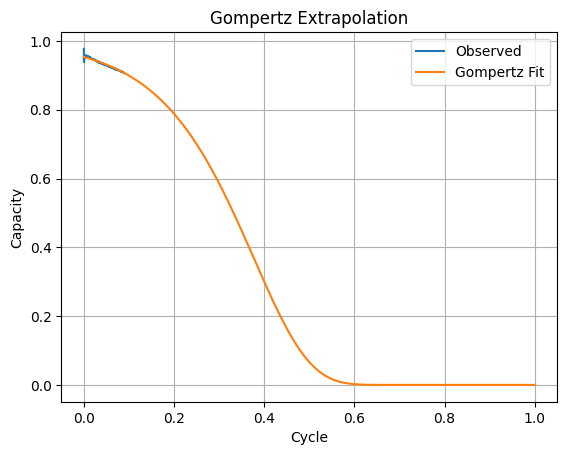

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

threshold = 900

#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))


x_data = np.array(df_eg['Cycle number'][:threshold].to_list())/10000.0
y_data = np.array(df_eg['SoH'][:threshold].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.998629,-3.067757,-8.128636]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel("Cycle")
plt.ylabel("Capacity")
plt.title("Gompertz Extrapolation")
plt.grid(True)
plt.show()

In [4]:
def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

print(f"Estimated RUL (cycle count to reach 70% SoH): {inverse_gompertz_func(0.7,*popt)*10000:.2f} cycles")

Estimated RUL (cycle count to reach 70% SoH): 2501.00 cycles


In [5]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

#mse = mean_squared_error([2468], [2501])
#rmse = np.sqrt(mse)
rmse = root_mean_squared_error([2468], [2501])
rmse

33.0

## 1. a hust target values

In [6]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,9-3.csv,0.982997,-3.780097,-13.953564,1905,0.171740,0.971740,0.971740
1,5-6.csv,0.992200,-3.234754,-8.788365,2460,0.165901,0.965901,0.965901
2,8-5.csv,0.944335,-4.248934,-22.640842,1348,0.137523,0.937523,0.937523
3,8-1.csv,0.945628,-4.333303,-23.960673,1308,0.140427,0.940427,0.940427
4,7-2.csv,0.983036,-3.608114,-11.879995,2030,0.168921,0.968921,0.968921


In [7]:
# import sklearn
# help(sklearn.metrics)

In [8]:
list_of_pred_rul = [] #store predicted rul in a list
list_of_rmse = [] #store rmses
print('File : k   a   b   RUL   PRED_RUL     RMSE')
for i, row in df_hust_gompertz.iterrows():
    file,k,a,b,rul = row['file'],row['k'],row['a'],row['b'],row['rul']
    pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
    list_of_pred_rul.append(pred_rul)
    rmse = root_mean_squared_error([rul], [pred_rul])
    
    list_of_rmse.append(rmse)
    print(file,' : ',k,a,b, rul,pred_rul,rmse)

df_hust_gompertz['gompertz_predicted_rul'] = list_of_pred_rul
df_hust_gompertz['predicted_rul_rmse'] = list_of_rmse

File : k   a   b   RUL   PRED_RUL     RMSE
9-3.csv  :  0.982996710370978 -3.780096777394503 -13.953563953778795 1905 1934.9109525608494 29.91095256084941
5-6.csv  :  0.9921996111545596 -3.2347540532801764 -8.788364964363595 2460 2482.3997824259477 22.399782425947706
8-5.csv  :  0.9443346580175198 -4.248934304346764 -22.640842325590288 1348 1344.013789366012 3.986210633988094
8-1.csv  :  0.9456276967857268 -4.333303170593512 -23.960673498137517 1308 1307.0956017467518 0.904398253248246
7-2.csv  :  0.9830361981621258 -3.608114072626324 -11.879995414587295 2030 2127.9688117788464 97.96881177884643
7-6.csv  :  0.9417780029108302 -4.459192978448658 -22.763033460453133 1419 1425.1716435676217 6.171643567621686
8-4.csv  :  0.9514917611225512 -4.194246073166067 -15.876141187795234 1885 1897.9283967923127 12.928396792312697
10-5.csv  :  0.974893214504243 -3.85201260069978 -13.306800422442864 2030 2064.4507963827655 34.450796382765475
4-8.csv  :  0.975866746940688 -3.952479998025472 -16.60350293

In [9]:
df_hust_gompertz['predicted_rul_rmse'].mean(),df_hust_gompertz['predicted_rul_rmse'].median(),df_hust_gompertz['rul'].mean()

(np.float64(27.90447548749285),
 19.422964485473813,
 np.float64(1897.6883116883116))

In [10]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH,gompertz_predicted_rul,predicted_rul_rmse
0,9-3.csv,0.982997,-3.780097,-13.953564,1905,0.171740,0.971740,0.971740,1934.910953,29.910953
1,5-6.csv,0.992200,-3.234754,-8.788365,2460,0.165901,0.965901,0.965901,2482.399782,22.399782
2,8-5.csv,0.944335,-4.248934,-22.640842,1348,0.137523,0.937523,0.937523,1344.013789,3.986211
3,8-1.csv,0.945628,-4.333303,-23.960673,1308,0.140427,0.940427,0.940427,1307.095602,0.904398
4,7-2.csv,0.983036,-3.608114,-11.879995,2030,0.168921,0.968921,0.968921,2127.968812,97.968812


In [11]:
root_mean_squared_error(df_hust_gompertz['rul'].to_list(),df_hust_gompertz['gompertz_predicted_rul'].to_list())

38.338620818222765

In [12]:
# 1. Calculate your standard RMSE 
rmse = root_mean_squared_error(df_hust_gompertz['rul'], df_hust_gompertz['gompertz_predicted_rul'])

# 2. Calculate the mean of the actual RUL
mean_rul = df_hust_gompertz['rul'].mean()

# 3. Calculate RMSE as a percentage (NRMSE)
nrmse_percent = (rmse / mean_rul) * 100

print(f"RMSE: {rmse}")
print(f"RMSE as % of Mean RUL: {nrmse_percent:.2f}%")

RMSE: 38.338620818222765
RMSE as % of Mean RUL: 2.02%


In [13]:
print(f'Proof of concept rmse : {df_hust_gompertz['predicted_rul_rmse'].mean():.2f} %rmse : {df_hust_gompertz['predicted_rul_rmse'].mean()*100/df_hust_gompertz['rul'].mean():.2f} %')

Proof of concept rmse : 27.90 %rmse : 1.47 %


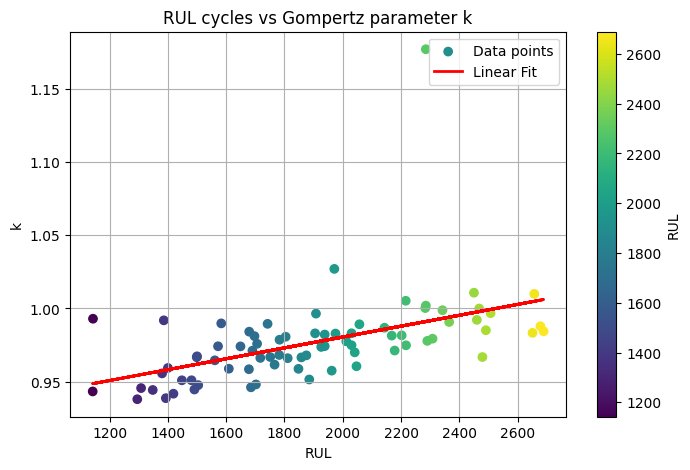

In [14]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['k']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('k')
plt.title('RUL cycles vs Gompertz parameter k')
plt.legend()
plt.grid(True)
plt.show()

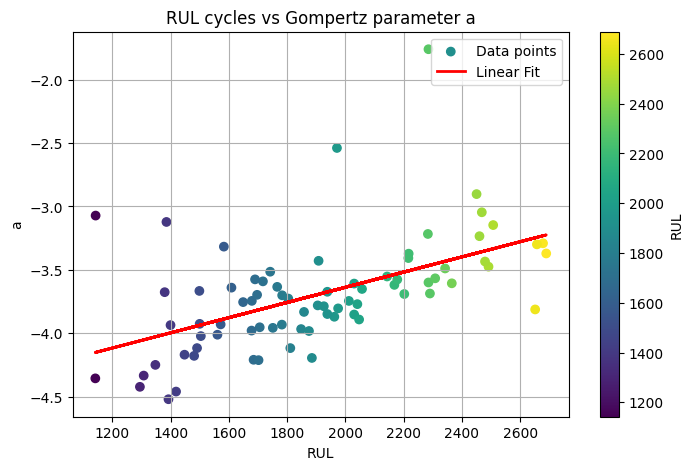

In [15]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['a']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('a')
plt.title('RUL cycles vs Gompertz parameter a')
plt.legend()
plt.grid(True)
plt.show()

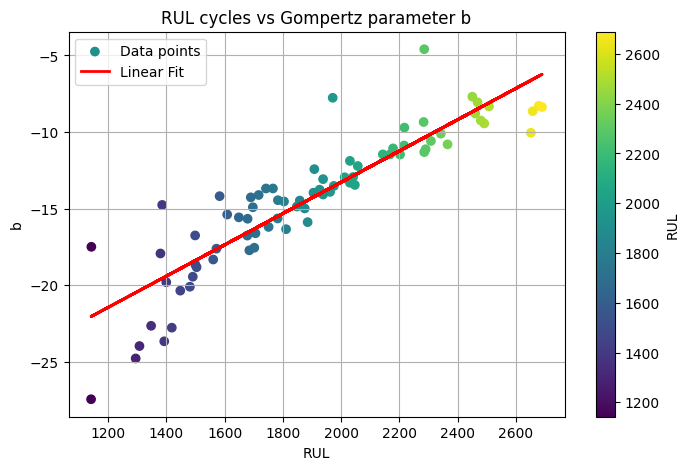

In [16]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['b']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('b')
plt.title('RUL cycles vs Gompertz parameter b')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    # plt.xticks(x, battery_ids)
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def multi_battery_scatter_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # Numeric x positions for scatter plot

    plt.figure(figsize=(12, 6))
    plt.scatter(x, true_ruls, color='blue', label='True RUL', marker='o')
    plt.scatter(x, pred_ruls, color='orange', label='Predicted RUL', marker='x')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [18]:
battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

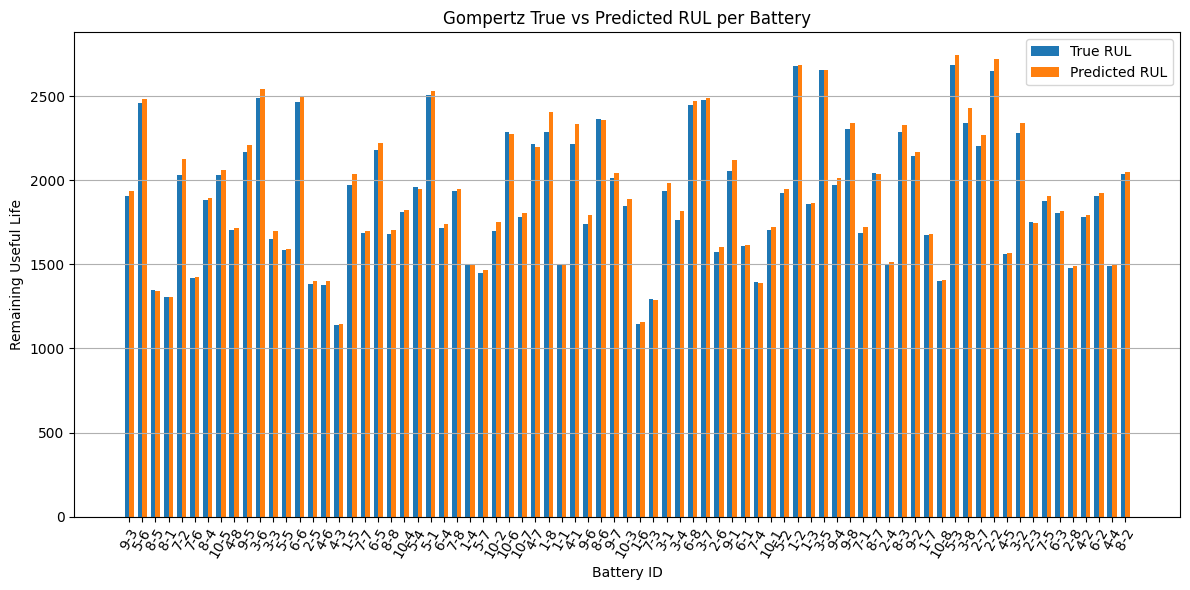

In [19]:
multi_battery_bar_plot(battery_data_dict)

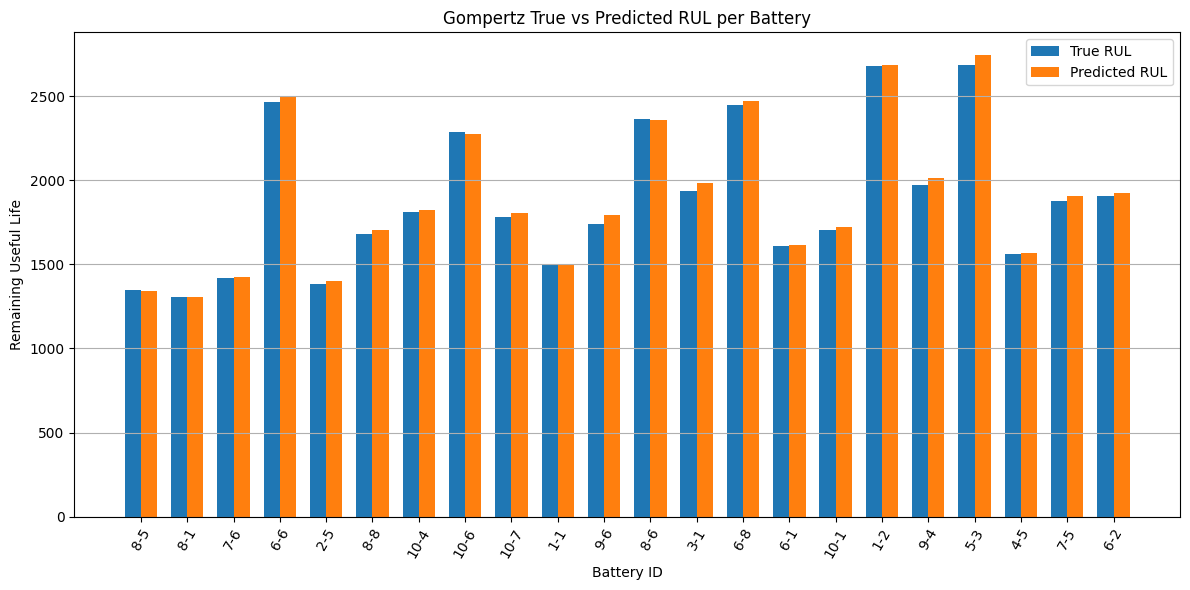

In [20]:
# test = ['7-6.csv','10-5.csv','7-7.csv','7-4.csv','4-7.csv','2-6.csv','10-2.csv','1-6.csv','8-4.csv','2-5.csv','1-1.csv','2-2.csv'] #My initial test csvs

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [
    '1-1',  '1-2',  '2-5',  '3-1',  '4-5',  '5-3',  '6-1',  '6-2',
    '6-6',  '6-8',  '7-5',  '7-6',  '8-1',  '8-5',  '8-6',  '8-8',
    '9-4',  '9-6',  '10-1', '10-4', '10-6', '10-7']

test = [i+'.csv' for i in test_ids] #similar to BatteryML HUST test cells 

battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    if row['file'] in test:
        battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

multi_battery_bar_plot(battery_data_dict)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    # Compute losses
    mse = mean_squared_error(true_ruls, pred_ruls)
    mae = mean_absolute_error(true_ruls, pred_ruls)
    
    # For Huber Loss, need tensors
    y_true_tensor = torch.tensor(true_ruls, dtype=torch.float32)
    y_pred_tensor = torch.tensor(pred_ruls, dtype=torch.float32)
    huber_loss_fn = nn.SmoothL1Loss()
    huber = huber_loss_fn(y_pred_tensor, y_true_tensor).item()

    # Print losses
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Huber Loss: {huber:.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

    # Plot
    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    return mse,mae,huber,np.sqrt(mse)

Mean Squared Error (MSE): 642.0174
Mean Absolute Error (MAE): 19.7571
Huber Loss: 19.2573
Root Mean Squared Error (RMSE): 25.3381


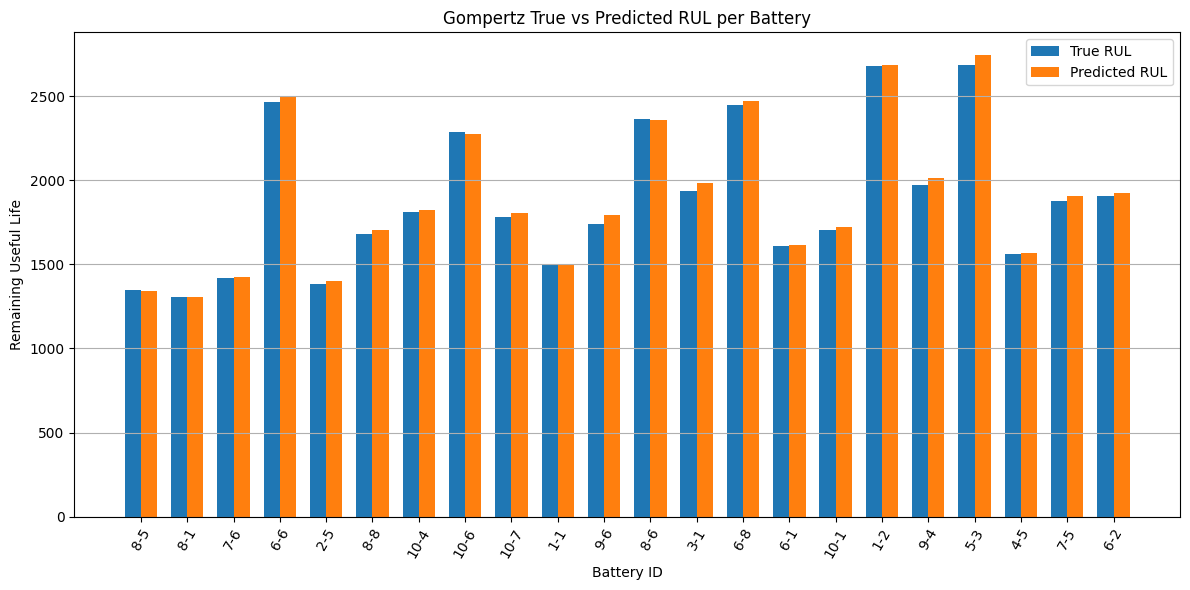

(642.0174473035661,
 19.757133975196936,
 19.257349014282227,
 np.float64(25.338063211373637))

In [22]:
multi_battery_bar_plot(battery_data_dict)

## 1. b per cycle error calculation

In [23]:
import re
import os

files = os.listdir(base_path+"csv-summary/")
#Filter out non-csv files, folders or csv that don't start with a digit

filtered = [f for f in files if re.match(r'^\d', f) and f.endswith('.csv')]

print(len(filtered))

pairs = [re.match(r'^(\d+-\d+)', f).group(1) for f in filtered]

print(pairs)

77
['6-6', '7-8', '5-3', '6-8', '5-5', '2-4', '10-3', '1-4', '6-3', '5-6', '8-3', '3-6', '10-4', '9-6', '3-2', '9-2', '9-7', '6-5', '4-8', '5-7', '1-5', '1-7', '1-8', '8-7', '6-2', '3-3', '6-1', '2-7', '1-2', '10-7', '10-1', '9-1', '8-5', '9-4', '4-4', '3-4', '10-6', '5-2', '7-5', '4-3', '5-4', '3-5', '7-2', '3-7', '1-3', '9-5', '3-1', '4-1', '9-3', '7-1', '8-8', '6-4', '4-2', '5-1', '2-3', '4-5', '4-6', '2-8', '8-1', '10-8', '9-8', '3-8', '7-3', '8-2', '8-6', '7-6', '10-5', '7-7', '7-4', '4-7', '2-6', '10-2', '1-6', '8-4', '2-5', '1-1', '2-2']


In [24]:
cycle_lengths = []
cycle_lengths_sort = {}
#Correlation of k, a and b with cycle number
##Place k, a and b of all cells in all cycles in one dataframe
for choice in pairs:
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    cycle_lengths.append(gompertz_df_full.shape[0])
    cycle_lengths_sort[choice] = gompertz_df_full.shape[0]
print(f"Max : {max(cycle_lengths)}, Min : {min(cycle_lengths)}")


#sort pairs by RUL
pairs = sorted(cycle_lengths_sort, key=cycle_lengths_sort.get)
print(pairs)

Max : 2689, Min : 1142
['4-3', '1-6', '7-3', '8-1', '8-5', '4-6', '2-5', '7-4', '10-8', '7-6', '5-7', '2-8', '4-4', '2-4', '1-4', '1-1', '4-5', '2-6', '5-5', '6-1', '3-3', '1-7', '8-8', '7-7', '7-1', '10-2', '10-1', '4-8', '6-4', '9-6', '2-3', '3-4', '4-2', '10-7', '6-3', '10-4', '10-3', '1-3', '7-5', '8-4', '9-3', '6-2', '5-2', '7-8', '3-1', '5-4', '1-5', '9-4', '9-7', '7-2', '10-5', '8-2', '8-7', '9-1', '9-2', '9-5', '6-5', '2-7', '4-7', '4-1', '3-2', '1-8', '10-6', '8-3', '9-8', '3-8', '8-6', '6-8', '5-6', '6-6', '3-7', '3-6', '5-1', '2-2', '3-5', '1-2', '5-3']


In [25]:
# Consolidate k,a,b data per cycle
unified_gompertz = {}
for choice in pairs:
    #get file
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    #add cell name
    gompertz_df_full['cell_name'] = choice
    for i in range(1,max(cycle_lengths)+1,1):
        try:
            temp_data = gompertz_df_full[gompertz_df_full["Cycle number"]==i].iloc[0].to_dict()
        except:
            temp_data = {'Cycle number': i, 'k': None, 'a': None,'b': None, 'rul': None, 'max_SoC_above_80': None,'SoH': None, 'cell_name': choice}
        try:
            unified_gompertz[i].append(temp_data)
        except:
            unified_gompertz[i] = []
            unified_gompertz[i].append(temp_data)

In [26]:
unified_gompertz.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [27]:
import pickle
#help(pickle)
#save consolidated gompertz per cycle as a pickle file

with open('unified_gompertz.pkl', 'wb') as file:
    pickle.dump(unified_gompertz, file)

In [28]:
unified_gompertz[1143]

[{'Cycle number': 1143,
  'k': None,
  'a': None,
  'b': None,
  'rul': None,
  'max_SoC_above_80': None,
  'SoH': None,
  'cell_name': '4-3'},
 {'Cycle number': 1143,
  'k': 0.9929696137655925,
  'a': -3.072267283798728,
  'b': -17.486426103703007,
  'rul': 1,
  'max_SoC_above_80': 30.53435391414142,
  'SoH': 0.7081841040843205,
  'gompertz-value': 0.947951156229196,
  'gompertz-1st-derivative-value': -0.7690909750111379,
  'gompertz-2nd-derivative-value': -12.824674225929034,
  'cell_name': '1-6'},
 {'Cycle number': 1143,
  'k': 0.9362102363776462,
  'a': -4.525393704158417,
  'b': -25.6844060389694,
  'rul': 153,
  'max_SoC_above_80': 27.18392499999986,
  'SoH': 0.7621633618796625,
  'gompertz-value': 0.9213095614052508,
  'gompertz-1st-derivative-value': -0.3796530621315583,
  'gompertz-2nd-derivative-value': -9.594716042852484,
  'cell_name': '7-3'},
 {'Cycle number': 1143,
  'k': 0.942463449037932,
  'a': -4.5095723268670245,
  'b': -25.534643242914665,
  'rul': 166,
  'max_SoC_a

In [29]:
#Compute Gompertz RUL prediction per cycle
gompertz_results = {}
for i in unified_gompertz.keys():
    ruls, pred_ruls = [],[]
    for k, j in enumerate(unified_gompertz[i]):
        k,a,b,rul = j['k'],j['a'],j['b'],unified_gompertz[1][k]['rul']
        if k == None: #skip over cells that have reached rul
            continue
        else:
            pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
            #print(i,j['k'],j['a'],j['b'],j['rul'],pred_rul)
            ruls.append(rul)
            pred_ruls.append(pred_rul)
    gompertz_results[i] = {'ruls':ruls,'pred_ruls':pred_ruls}
    #break

    # 2. Calculate the mean of the actual RUL
    mean_rul = np.mean(ruls)
    
    # 3. Calculate RMSE as a percentage (NRMSE)
    nrmse_percent = (rmse / mean_rul) * 100

In [30]:
gompertz_results[2500]

{'ruls': [2507, 2651, 2657, 2678, 2689],
 'pred_ruls': [np.float64(2530.062596026052),
  np.float64(2739.5393341728395),
  np.float64(2623.2964216363785),
  np.float64(2665.468055288309),
  np.float64(2750.5101973706483)]}

In [44]:
cycle_rmse = {}
cycle_nrmse = {}
for i in gompertz_results.keys():
    cycle_rmse[i] = root_mean_squared_error(gompertz_results[i]['ruls'],gompertz_results[i]['pred_ruls'])
    cycle_nrmse[i] = (cycle_rmse[i]/np.mean(gompertz_results[i]['ruls']))*100
print(cycle_rmse)

{1: 6672.627634435939, 2: 6565.314322016153, 3: 6516.098520082627, 4: 6489.555438000256, 5: 6470.417689809465, 6: 6455.8485762456285, 7: 6443.974219055584, 8: 6389.707745828762, 9: 6379.193453555486, 10: 6539.343095865465, 11: 6365.2314327858885, 12: 6359.490730289697, 13: 6369.088517694163, 14: 7166.284071849445, 15: 5205.713845012421, 16: 15641.239576588217, 17: 2885.244367728777, 18: 76616.04456461979, 19: 2978.336332296233, 20: 2904.6370296076598, 21: 2079.995199623454, 22: 2112.3196644461386, 23: 2063.750816526259, 24: 2070.6554569701107, 25: 2068.18067055936, 26: 2065.762988051474, 27: 2055.9934844212744, 28: 2065.7725308433137, 29: 2064.9354311039733, 30: 2060.0507362637845, 31: 2068.206983781494, 32: 2085.0955121261536, 33: 2081.562415004851, 34: 2072.939341117094, 35: 2092.1075667108807, 36: 2096.394728259713, 37: 2122.5648514970353, 38: 2112.5213533811107, 39: 2130.505202632783, 40: 2133.8996886972063, 41: 2145.8837946239105, 42: 2162.6284586343954, 43: 2188.2495268262605, 44

In [45]:
print(cycle_nrmse)

{1: np.float64(351.6187349280515), 2: np.float64(345.9637856005556), 3: np.float64(343.37032482881585), 4: np.float64(341.9716187336744), 5: np.float64(340.9631418371832), 6: np.float64(340.19541230678027), 7: np.float64(339.5696848299914), 8: np.float64(336.71007543615247), 9: np.float64(336.15601752218856), 10: np.float64(344.59521384982475), 11: np.float64(335.4202791670751), 12: np.float64(335.1177688727958), 13: np.float64(335.6235309278894), 14: np.float64(377.63230282394665), 15: np.float64(274.3186967506306), 16: np.float64(824.2259532426964), 17: np.float64(152.03995039427042), 18: np.float64(4037.3355357001165), 19: np.float64(156.94549594640776), 20: np.float64(153.06186014411918), 21: np.float64(109.60678773285746), 22: np.float64(111.31014779591895), 23: np.float64(108.7507787140348), 24: np.float64(109.11462352465647), 25: np.float64(108.98421294060492), 26: np.float64(108.85681148626732), 27: np.float64(108.34200072572106), 28: np.float64(108.85731435029302), 29: np.floa

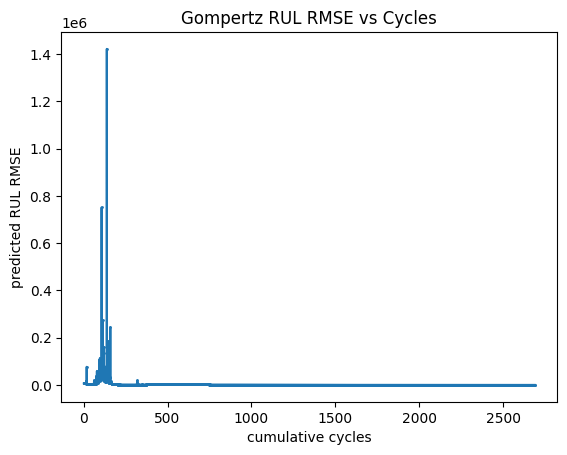

In [46]:
#Plot rmse per cycle
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.grid(False)
plt.show()

In [47]:
# help(plt.yscale)

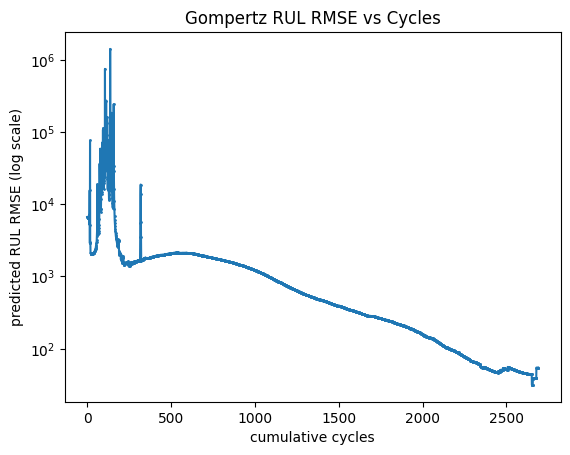

In [48]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
plt.show()

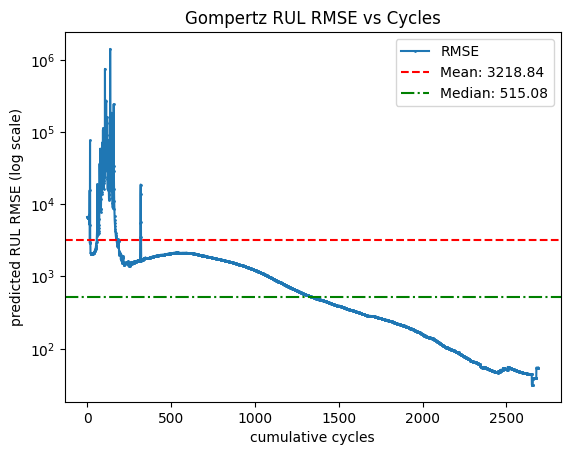

In [54]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

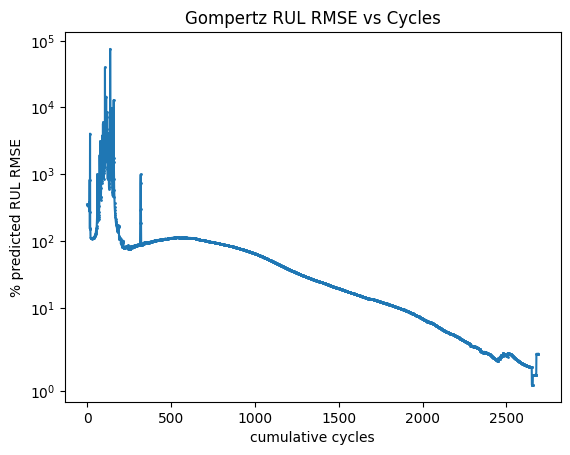

In [36]:
#Plot rmse per cycle
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('% predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
plt.show()

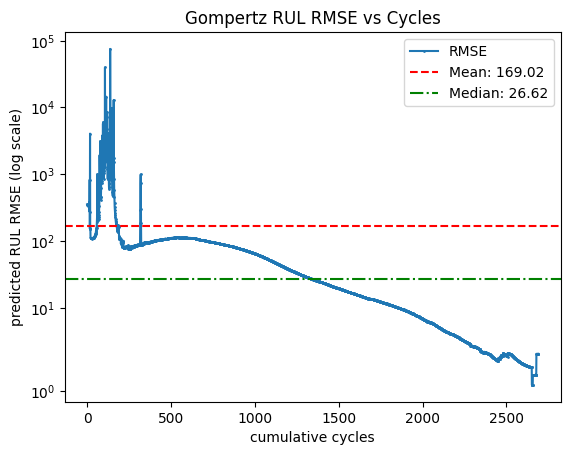

In [43]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

In [37]:
#save gompertz results
with open('gompertz_results.pkl', 'wb') as file:
    pickle.dump(gompertz_results, file)

In [41]:
np.median(y),np.mean(y)

(np.float64(26.62314090303185), np.float64(169.02374524235506))

# 2. NNs

## 2a. LSTMs that predict SoH from SoH

In [38]:
#ongoing
#to be tested upon completion

## 2b. NNs that predict RUL from SoH

In [ ]:
## NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML) or 500, 1000 to improve the accuracy

# 3. GINNs

## 3a. LSTMs that predict SoH from SoH then pass the predicted curve through a gompertz fitting model and calculate rul using the inverse gompertz eqn 

In [ ]:
## use models from 2a to accomplish this.

## 3b. NNs that predict k,a and b from SoH, then use the inverse gompertz eqn to calculate RUL

In [ ]:
## Use NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML) or 500, 1000 to improve the accuracy and the output is k,a and b. Here usage of dy/dx may be crucial.